**Pytorch library**

1.   torch:Pytorch core library
2.   torchvision: The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision. https://pytorch.org/vision/stable/index.html
**Python library**

1.   matplotlib: https://matplotlib.org/stable/users/explain/quick_start.html
2.   numpy:https://numpy.org/doc/stable/user/quickstart.html


In [ ]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
%matplotlib inline


Here we can utilize the torchvision library to utilize the available dataset in the library which is very convinient as a beginer. we already imported torchvision and dataset above as:

*  **import torchvision**

*   **from torchvision.datasets import MNIST**

We can see the sub-folder as data in working root directory after data downloading.





In [ ]:
#download and define dataset
dataset = MNIST(root = 'data/', download =True, transform = ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12009954.22it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 397713.88it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3660427.75it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4175000.83it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



We can iterate through our dataset and verify the dowloaded dataset. Since we already verified it in the folder where it shows each data has an image associated with it's label. Here, we evaluated the first image. We can check the size of our datasets.


Image shape:  torch.Size([1, 28, 28])
Label:  5
Total data 60000


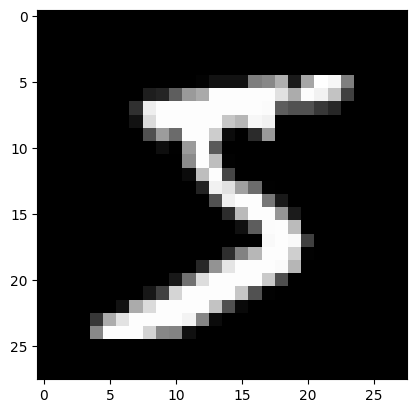

In [ ]:
image, label = dataset[0]
print('Image shape: ', image.shape)
plt.imshow(image.permute(1,2,0),cmap = 'gray')
print('Label: ', label)
total_data = len(dataset)
print('Total data', total_data)


Image 1 shape:  torch.Size([1, 28, 28])


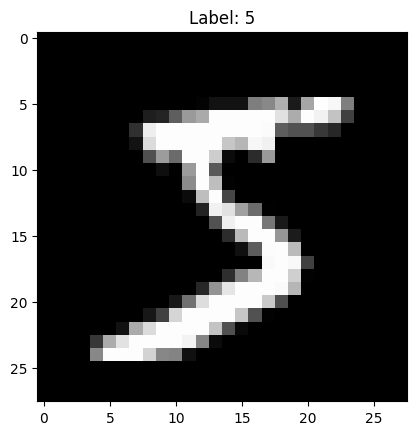

Image 2 shape:  torch.Size([1, 28, 28])


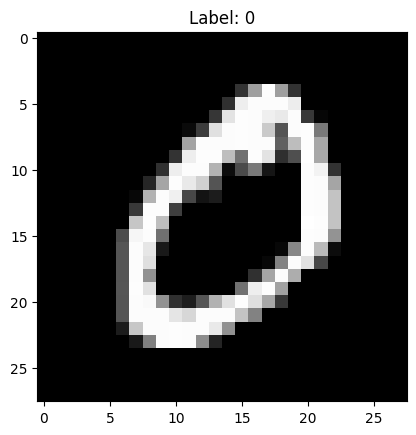

Image 3 shape:  torch.Size([1, 28, 28])


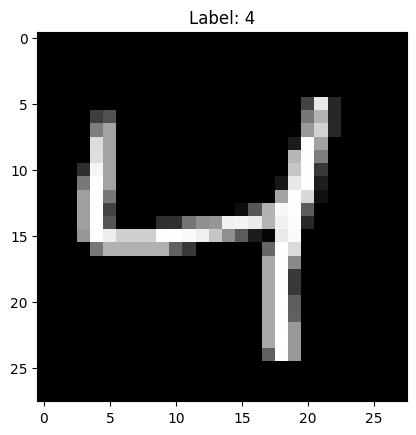

Image 4 shape:  torch.Size([1, 28, 28])


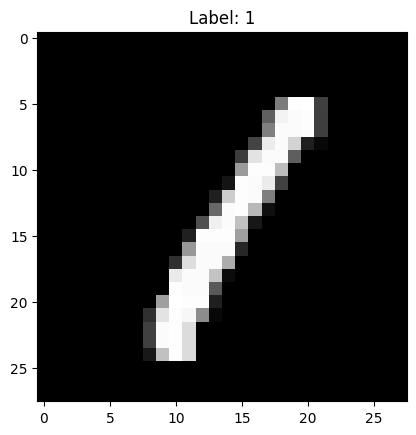

Image 5 shape:  torch.Size([1, 28, 28])


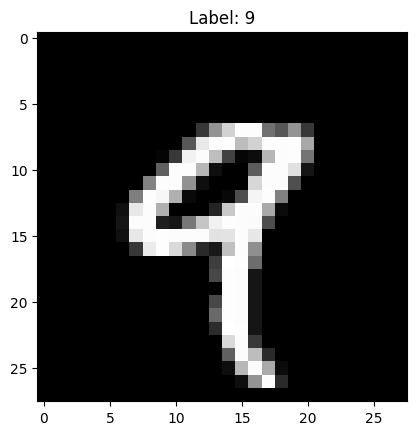

Total data: 60000


In [ ]:
#Here I am trying to iterate through other images for your understanding
for i in range(5):
    image, label = dataset[i]
    print(f'Image {i+1} shape: ', image.shape)
    plt.imshow(image.permute(1, 2, 0), cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()
total_data = len(dataset)
print('Total data:', total_data)

In the process of training a deep learning model we need to separate our dataset in 3 vital part as:

1.   **Training set**
2.   **Validation set**
3. **Test set**

Here, we can choose different ratio like(70%-30%) and (80%-20%) based on our task requirements and previous research works.



In [ ]:
val_size = 15000
train_size = len(dataset)-val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 15000)

**What is batch size and why do we need it in the deep learning model training process?**

In [ ]:
batch_size = 256

Now we need to define a data loading mechanism for both training dataset and validating dataset for smooth training progress. Here, we utilized the pytorch data loading function as:

*   from torch.utils.data.dataloader import DataLoader
*  Check the function details here: https://pytorch.org/docs/stable/data.html

**So we can check lenth of training and validating cycle:

1.   Round((45000/256), 0)= 176
2.   Round((15000/256*2), 0)=30



In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle= True, num_workers = 2, pin_memory = True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers = 2, pin_memory = True)
print(len(train_loader))
print(len(val_loader))

176
30


To understand our task broadly we can plot a batch of our training data below:

Image shape:  torch.Size([256, 1, 28, 28])


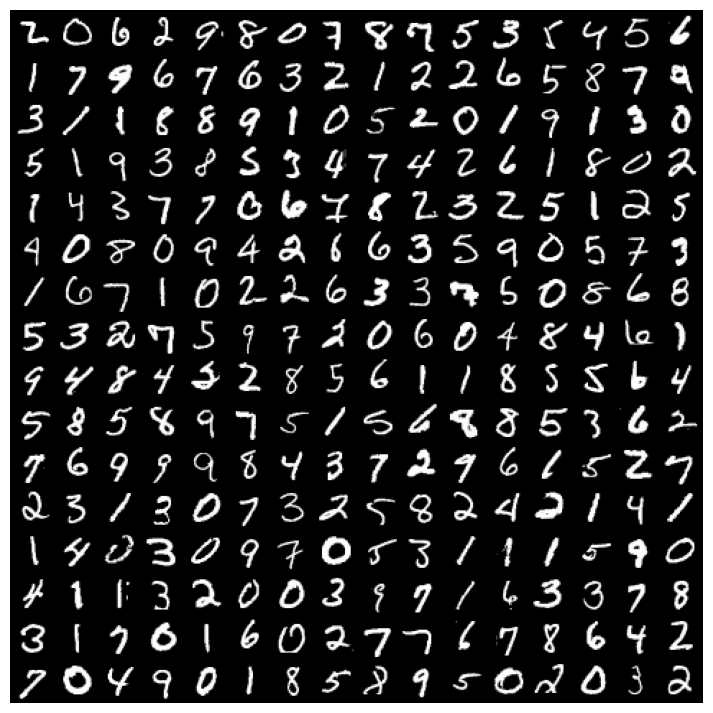

In [ ]:
for images, labels in train_loader:
  print("Image shape: ", images.shape)
  plt.figure(figsize = (16,9))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
  break

Now we have prepared our data and need to design our neural network model where we will utilized linerar layer for the input processing as **nn.Linear**: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear.

Mainly in a neural network model we have following steps:



1.   Training: need to calculate the loss(https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
2.   Validating: need to calculate the loss
3. Updating



Here, we defined the model and processing forward pass for linear processing.

In the model training we also defined the training step and validation step and implement total 5 layers.
Added ReLU activations after the new hidden layers, just like the first two hidden layers.


In [ ]:
class MnistModel(nn.Module):
    """Feedforward neural network with 3 hidden layers (total 5 layers including input and output)"""
    def __init__(self, in_size, layer1_size, layer2_size, layer3_size, layer4_size, output_size):
        super().__init__()
        # Hidden layer 1
        self.linear1 = nn.Linear(in_size, layer1_size)
        # Hidden layer 2
        self.linear2 = nn.Linear(layer1_size, layer2_size)
        # Hidden layer 3
        self.linear3 = nn.Linear(layer2_size, layer3_size)
        # Hidden layer 4
        self.linear4 = nn.Linear(layer3_size, layer4_size)
        # Output layer
        self.linear5 = nn.Linear(layer4_size, output_size)

    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Hidden layer 1 with ReLU activation
        out = F.relu(self.linear1(xb))
        # Hidden layer 2 with ReLU activation
        out = F.relu(self.linear2(out))
        # Hidden layer 3 with ReLU activation
        out = F.relu(self.linear3(out))
        # Hidden layer 4 with ReLU activation
        out = F.relu(self.linear4(out))
        # Output layer (no activation for the output)
        out = self.linear5(out)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

# Utility function to calculate accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))



Now we need to define an accuracy function to measure our model performance as follows:

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Initilize the parameter for our 5 layers model:

In [ ]:
input_size = 784
l1_size = 128
l2_size = 64
l3_size = 32
l4_size = 16
output_classes = 10


Initializing our model and verify the expected model parameter according to model defination:

In [ ]:
model = MnistModel(input_size, l1_size, l2_size, l3_size, l4_size, output_classes)
for t in model.parameters():
    print(t.shape)


torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([32, 64])
torch.Size([32])
torch.Size([16, 32])
torch.Size([16])
torch.Size([10, 16])
torch.Size([10])


Now let's run our model with a batch of input to verify if it works according to defination. Here we can verify following parameters:

1.   Expected output shape which is (256 imaages with 10 different probability of label)
2.   Each output will have 10 label possibility for [0-9]



In [ ]:
for images, labels in train_loader:
    output = model(images)
    loss = F.cross_entropy(output, labels)
    print('Loss: ', loss.item())
    break

print('Output shape: ', output.shape)
print('Sample output: ', output[0])


Loss:  2.3150651454925537
Output shape:  torch.Size([256, 10])
Sample output:  tensor([-0.1775, -0.2372,  0.0719,  0.0674, -0.2428,  0.1877,  0.0851, -0.1646,
         0.0536, -0.1961], grad_fn=<SelectBackward0>)


Using GPU

In [ ]:
torch.cuda.is_available()

True

In [ ]:
def get_default_device():
  """pick GPU if available else pick cpu"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

Let's move the data and model to the chossen device

In [ ]:
def to_device(data, device):
  """Move tensor to choosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True)

In [ ]:
for images, labels in train_loader:
  print('iamges shape: ', images.shape)
  images = to_device(images, device)
  print(images.device)
  break

iamges shape:  torch.Size([256, 1, 28, 28])
cuda:0


Finally, we define a DeviceDataLoader class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an __iter__ method to retrieve batches of data and an __len__ method to get the number of batches.

In [ ]:
class DeviceDataLoader():
  """wrap datalaoder to move data to a device"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """yeild a batch of data after moving to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)



wrapping dataLoader using device dataloader

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
print(len(val_loader))

30


In [ ]:
# for xb, yb in val_loader:
#   plt.imshow(xb[0].cpu().permute(1,2,0))
#   print('Device: ', xb.device)
#   print('yb.value: ', yb)
#   print(len(yb))
#   break


We'll define two functions: fit and evaluate to train the model using gradient descent and evaluate its performance on the validation set.

In [ ]:
def evaluate(model, val_loader):
  """Evaluate the model performance on the validation set"""
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    #training Phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #validation step
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history


In [ ]:
#Model on GPu
model = MnistModel(in_size=input_size,
                   layer1_size=l1_size,
                   layer2_size=l2_size,
                   layer3_size=l3_size,
                   layer4_size=l4_size,
                   output_size=output_classes)

to_device(model, device)


MnistModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=32, bias=True)
  (linear4): Linear(in_features=32, out_features=16, bias=True)
  (linear5): Linear(in_features=16, out_features=10, bias=True)
)

In [ ]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.31538462638855, 'val_acc': 0.08987801522016525}]

In [ ]:
# #with 1 hidden Layer
history += fit(20, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 2.3049, val_acc: 0.1122
Epoch [1], val_loss: 2.3043, val_acc: 0.1118
Epoch [2], val_loss: 2.3038, val_acc: 0.1115
Epoch [3], val_loss: 2.3032, val_acc: 0.1112
Epoch [4], val_loss: 2.3026, val_acc: 0.1110
Epoch [5], val_loss: 2.3020, val_acc: 0.1108
Epoch [6], val_loss: 2.3014, val_acc: 0.1107
Epoch [7], val_loss: 2.3008, val_acc: 0.1107
Epoch [8], val_loss: 2.3002, val_acc: 0.1108
Epoch [9], val_loss: 2.2996, val_acc: 0.1109
Epoch [10], val_loss: 2.2990, val_acc: 0.1111
Epoch [11], val_loss: 2.2984, val_acc: 0.1112
Epoch [12], val_loss: 2.2978, val_acc: 0.1112
Epoch [13], val_loss: 2.2971, val_acc: 0.1112
Epoch [14], val_loss: 2.2965, val_acc: 0.1115
Epoch [15], val_loss: 2.2958, val_acc: 0.1119
Epoch [16], val_loss: 2.2951, val_acc: 0.1126
Epoch [17], val_loss: 2.2944, val_acc: 0.1129
Epoch [18], val_loss: 2.2937, val_acc: 0.1134


In [ ]:
# with 4 hidden layers
history += fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.2921, val_acc: 0.1151
Epoch [1], val_loss: 2.2913, val_acc: 0.1157
Epoch [2], val_loss: 2.2905, val_acc: 0.1169
Epoch [3], val_loss: 2.2896, val_acc: 0.1180
Epoch [4], val_loss: 2.2887, val_acc: 0.1195
Epoch [5], val_loss: 2.2877, val_acc: 0.1208
Epoch [7], val_loss: 2.2856, val_acc: 0.1245
Epoch [8], val_loss: 2.2845, val_acc: 0.1268
Epoch [9], val_loss: 2.2833, val_acc: 0.1286
Epoch [10], val_loss: 2.2820, val_acc: 0.1312
Epoch [11], val_loss: 2.2806, val_acc: 0.1331
Epoch [12], val_loss: 2.2792, val_acc: 0.1357
Epoch [13], val_loss: 2.2776, val_acc: 0.1395
Epoch [14], val_loss: 2.2759, val_acc: 0.1429
Epoch [15], val_loss: 2.2741, val_acc: 0.1477
Epoch [16], val_loss: 2.2721, val_acc: 0.1551
Epoch [17], val_loss: 2.2699, val_acc: 0.1658
Epoch [18], val_loss: 2.2676, val_acc: 0.1815


In [ ]:
# with 4 hidden layers
history += fit(20, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 2.2624, val_acc: 0.2154
Epoch [1], val_loss: 2.2595, val_acc: 0.2282
Epoch [2], val_loss: 2.2563, val_acc: 0.2388
Epoch [3], val_loss: 2.2529, val_acc: 0.2438
Epoch [4], val_loss: 2.2491, val_acc: 0.2429
Epoch [5], val_loss: 2.2450, val_acc: 0.2393
Epoch [6], val_loss: 2.2404, val_acc: 0.2348
Epoch [7], val_loss: 2.2354, val_acc: 0.2300
Epoch [8], val_loss: 2.2299, val_acc: 0.2253
Epoch [9], val_loss: 2.2239, val_acc: 0.2210
Epoch [10], val_loss: 2.2174, val_acc: 0.2206
Epoch [11], val_loss: 2.2104, val_acc: 0.2263
Epoch [12], val_loss: 2.2028, val_acc: 0.2368
Epoch [13], val_loss: 2.1945, val_acc: 0.2495
Epoch [14], val_loss: 2.1856, val_acc: 0.2594
Epoch [16], val_loss: 2.1656, val_acc: 0.2709
Epoch [17], val_loss: 2.1545, val_acc: 0.2750
Epoch [18], val_loss: 2.1428, val_acc: 0.2777
Epoch [19], val_loss: 2.1307, val_acc: 0.2812


In [ ]:
# with 4 hidden layers
history += fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.1181, val_acc: 0.2843
Epoch [1], val_loss: 2.1053, val_acc: 0.2877
Epoch [2], val_loss: 2.0922, val_acc: 0.2894
Epoch [4], val_loss: 2.0660, val_acc: 0.2958
Epoch [5], val_loss: 2.0528, val_acc: 0.2998
Epoch [6], val_loss: 2.0397, val_acc: 0.3030
Epoch [7], val_loss: 2.0265, val_acc: 0.3070
Epoch [9], val_loss: 1.9997, val_acc: 0.3159
Epoch [10], val_loss: 1.9861, val_acc: 0.3202
Epoch [11], val_loss: 1.9720, val_acc: 0.3264
Epoch [12], val_loss: 1.9576, val_acc: 0.3319
Epoch [13], val_loss: 1.9426, val_acc: 0.3386
Epoch [14], val_loss: 1.9270, val_acc: 0.3450
Epoch [15], val_loss: 1.9106, val_acc: 0.3505
Epoch [16], val_loss: 1.8933, val_acc: 0.3556
Epoch [17], val_loss: 1.8750, val_acc: 0.3620
Epoch [18], val_loss: 1.8555, val_acc: 0.3668
Epoch [19], val_loss: 1.8346, val_acc: 0.3720


In [ ]:
# with 4 hidden layers
history += fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8122, val_acc: 0.3778
Epoch [2], val_loss: 1.7627, val_acc: 0.3861
Epoch [3], val_loss: 1.7355, val_acc: 0.3901
Epoch [4], val_loss: 1.7067, val_acc: 0.3952
Epoch [6], val_loss: 1.6436, val_acc: 0.4035
Epoch [7], val_loss: 1.6114, val_acc: 0.4111
Epoch [8], val_loss: 1.5791, val_acc: 0.4181
Epoch [9], val_loss: 1.5471, val_acc: 0.4259
Epoch [10], val_loss: 1.5156, val_acc: 0.4318
Epoch [11], val_loss: 1.4847, val_acc: 0.4402
Epoch [12], val_loss: 1.4551, val_acc: 0.4472
Epoch [13], val_loss: 1.4265, val_acc: 0.4543
Epoch [14], val_loss: 1.3992, val_acc: 0.4623
Epoch [15], val_loss: 1.3732, val_acc: 0.4693
Epoch [16], val_loss: 1.3485, val_acc: 0.4787
Epoch [17], val_loss: 1.3252, val_acc: 0.4878
Epoch [18], val_loss: 1.3037, val_acc: 0.4979
Epoch [19], val_loss: 1.2834, val_acc: 0.5108


In [ ]:
# with 4 hidden layers
history += fit(40, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5401, val_acc: 0.8432
Epoch [1], val_loss: 0.5374, val_acc: 0.8443
Epoch [2], val_loss: 0.5350, val_acc: 0.8449
Epoch [3], val_loss: 0.5326, val_acc: 0.8456
Epoch [4], val_loss: 0.5305, val_acc: 0.8464
Epoch [5], val_loss: 0.5279, val_acc: 0.8466
Epoch [6], val_loss: 0.5255, val_acc: 0.8482
Epoch [7], val_loss: 0.5234, val_acc: 0.8489
Epoch [8], val_loss: 0.5207, val_acc: 0.8495
Epoch [9], val_loss: 0.5184, val_acc: 0.8506
Epoch [10], val_loss: 0.5158, val_acc: 0.8519
Epoch [11], val_loss: 0.5146, val_acc: 0.8518
Epoch [12], val_loss: 0.5117, val_acc: 0.8525
Epoch [13], val_loss: 0.5096, val_acc: 0.8534
Epoch [14], val_loss: 0.5071, val_acc: 0.8549
Epoch [15], val_loss: 0.5052, val_acc: 0.8545
Epoch [16], val_loss: 0.5029, val_acc: 0.8554
Epoch [17], val_loss: 0.5014, val_acc: 0.8562
Epoch [18], val_loss: 0.4984, val_acc: 0.8583
Epoch [19], val_loss: 0.4964, val_acc: 0.8569
Epoch [20], val_loss: 0.4942, val_acc: 0.8581
Epoch [21], val_loss: 0.4920, val_acc: 0.859

Text(0.5, 1.0, 'Loss vs num of epochs')

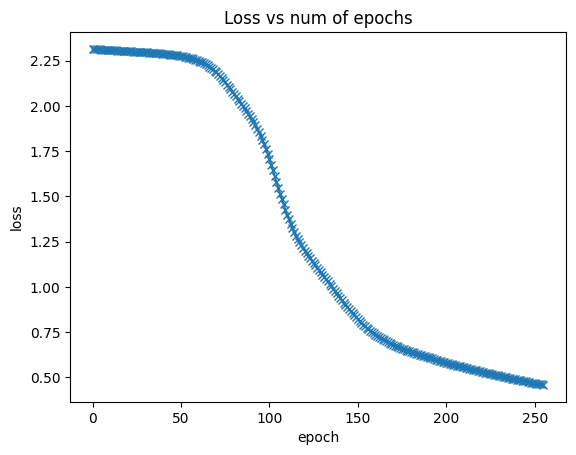

In [ ]:
#with 4 hidden layer
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs num of epochs')

Text(0.5, 1.0, 'Accuracy vs No. of epochs with 4 hidden layers')

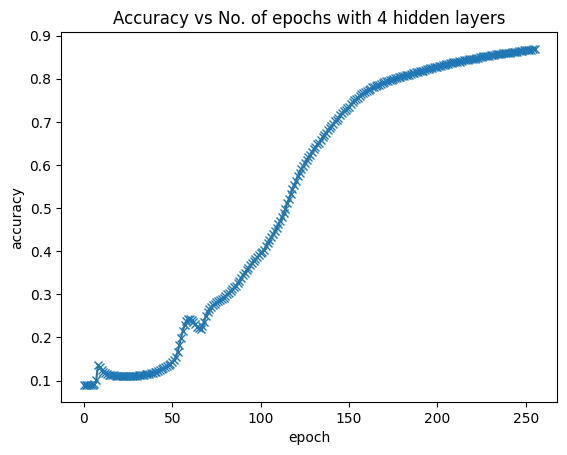

In [ ]:
# 4 hidden layer accuracy
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs with 4 hidden layers')

Defining the test dataset

In [ ]:
test_dataset = MNIST(root = 'data/', train=False, transform = ToTensor())

In [ ]:
def predict_image(image, model):
  xb = to_device(image.unsqueeze(0), device)
  yb = model(xb)
  _,pred  = torch.max(yb, dim= 1)
  return pred[0].item()

Label:  7
predicted:  7


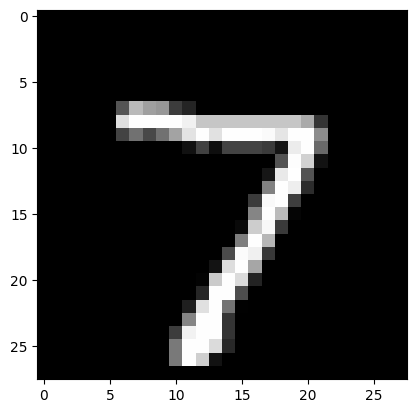

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Label:  9
predicted:  7


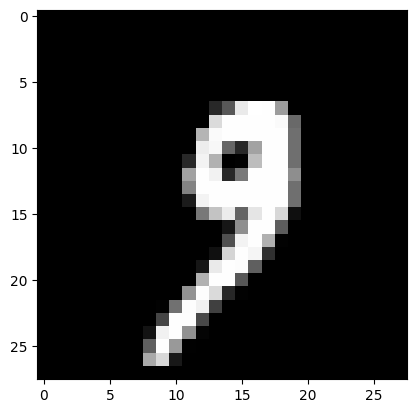

In [ ]:
img, label = test_dataset[1000]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Label:  1
predicted:  1


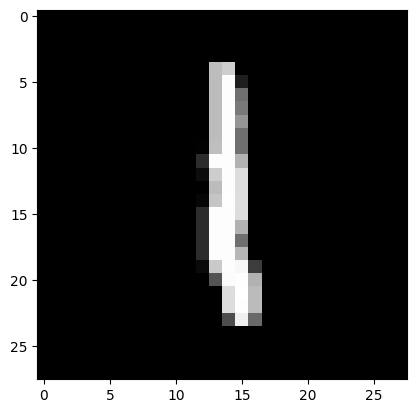

In [ ]:
img, label = test_dataset[302]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Label:  4
predicted:  4


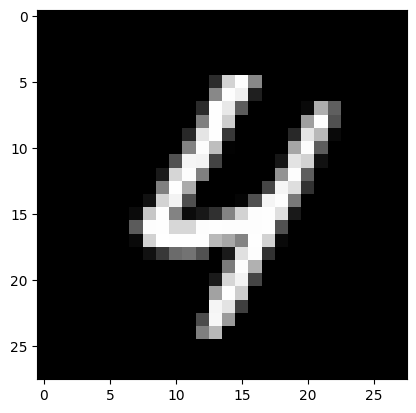

In [ ]:
img, label = test_dataset[1557]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Label:  0
predicted:  0


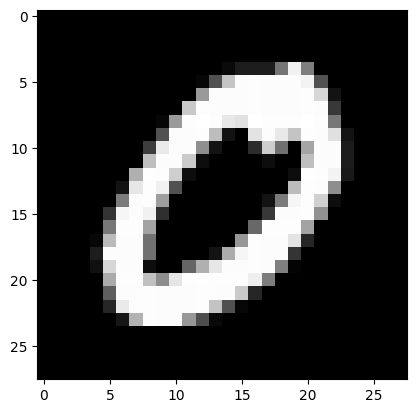

In [ ]:
img, label = test_dataset[8765]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Label:  9
predicted:  7


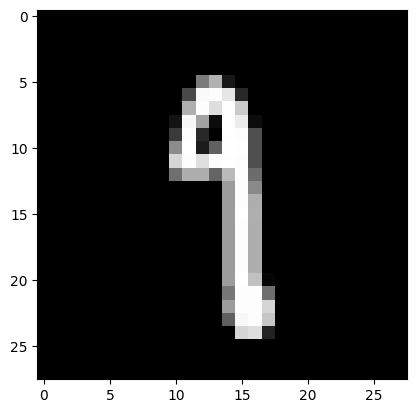

In [ ]:
img, label = test_dataset[2387]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Evaluate overall loss and accuracy of the model

Label:  5
predicted:  2


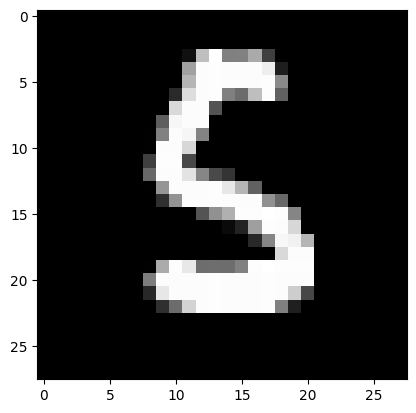

In [ ]:
img, label = test_dataset[1233]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Label:  0
predicted:  6


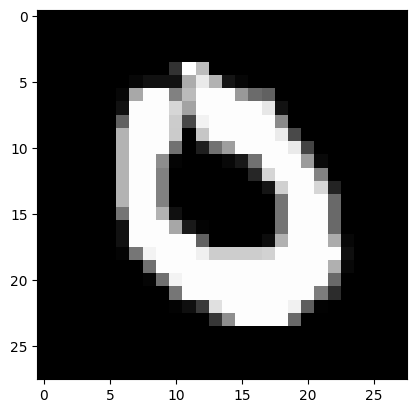

In [ ]:
img, label = test_dataset[5987]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

Label:  0
predicted:  0


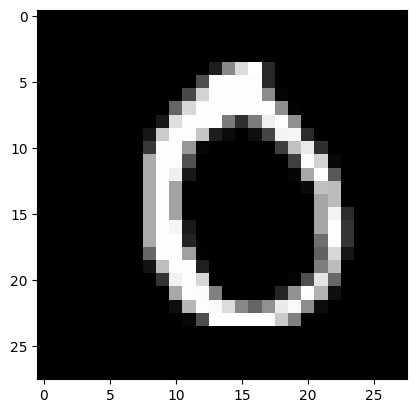

In [ ]:
img, label = test_dataset[8558]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label)
print('predicted: ', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size= 256), device)

In [ ]:
#with 1 hidden layer
result=evaluate(model, test_loader)
result

{'val_loss': 0.43828317523002625, 'val_acc': 0.8759765625}

In [ ]:
# with 4 hidden layers
result = evaluate(model, test_loader)
result


{'val_loss': 0.43828317523002625, 'val_acc': 0.8759765625}